In [110]:
import torch
import numpy as np
import pandas as pd

In [111]:
df =pd.read_csv(r"C:\Users\HoganL\Desktop\datasets\LTE combined data.csv")
df.drop(df.columns[0],axis=True,inplace=True)

c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [112]:
df.head()

,Timestamp,Longitude,Latitude,Speed,Operatorname,CellID,NetworkMode,RSRP,RSRQ,SNR,...,RSSI,DL_bitrate,UL_bitrate,State,NRxRSRP,NRxRSRQ,ServingCell_Lon,ServingCell_Lat,ServingCell_Distance,path
0,2018.01.25_19.50.43,-8.466939,51.897914,46,B,2,LTE,-99,-14,-2.0,...,-82,1688,31,D,-100.0,-17.0,-8.464806,51.891945,679.66999999999996,bus
1,2018.01.25_19.50.44,-8.466616,51.897283,30,B,2,LTE,-99,-14,-1.0,...,-78,1688,31,D,-100.0,-17.0,-8.464806,51.891945,606.40999999999997,bus
2,2018.01.25_19.50.44,-8.466616,51.897283,30,B,2,LTE,-99,-14,-2.0,...,-78,1498,27,D,-100.0,-17.0,-8.464806,51.891945,606.40999999999997,bus
3,2018.01.25_19.50.46,-8.466616,51.897283,30,B,2,LTE,-98,-15,-1.0,...,-81,1286,24,D,-103.0,-18.0,-8.464806,51.891945,606.40999999999997,bus
4,2018.01.25_19.50.47,-8.466616,51.897283,30,B,2,LTE,-98,-15,-1.0,...,-91,548,20,D,-103.0,-18.0,-8.464806,51.891945,606.40999999999997,bus


In [113]:
df.isnull().sum()

Timestamp               0
Longitude               0
Latitude                0
Speed                   0
Operatorname            0
CellID                  0
NetworkMode             0
RSRP                    0
RSRQ                    0
SNR                     0
CQI                     0
RSSI                    0
DL_bitrate              0
UL_bitrate              0
State                   0
NRxRSRP                 0
NRxRSRQ                 0
ServingCell_Lon         0
ServingCell_Lat         0
ServingCell_Distance    0
path                    0
dtype: int64

change all the  categorial data to  number

summary of all numical data

In [114]:
df.describe(include=(np.number))

,Longitude,Latitude,Speed,CellID,RSRP,DL_bitrate,UL_bitrate
count,174523.000000,174523.000000,174523.000000,174523.000000,174523.000000,174523.000000,174523.000000
mean,-8.441232,52.017980,30.530429,4563.573741,-91.517542,10822.324427,184.749529
std,0.419659,0.306211,38.297034,12035.047726,16.342720,14149.653859,220.538218
min,-9.589915,51.871394,0.000000,0.000000,-200.000000,0.000000,0.000000
25%,-8.505997,51.893450,0.000000,2.000000,-102.000000,1386.000000,32.000000
50%,-8.488805,51.899414,17.000000,2.000000,-93.000000,5370.000000,107.000000
75%,-8.459378,51.935595,46.000000,8.000000,-82.000000,14796.000000,266.000000
max,-6.295653,53.346380,166.000000,65353.000000,-27.000000,173016.000000,4178.000000


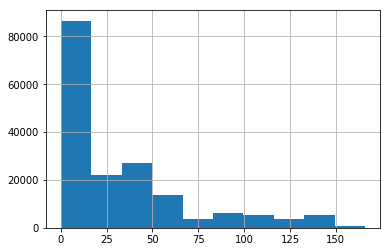

In [115]:
df.Speed.hist();

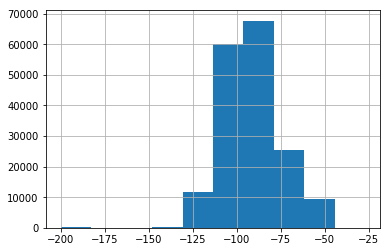

In [116]:
df.RSRP.hist();

quick summary of all the non-numeric columns in the datase

In [117]:
df.describe(include=[object])

,Timestamp,Operatorname,NetworkMode,RSRQ,SNR,CQI,RSSI,State,NRxRSRP,NRxRSRQ,ServingCell_Lon,ServingCell_Lat,ServingCell_Distance,path
count,174523,174523,174523,174523,174523,174523,174523,174523,174523,174523,174523,174523,174523,174523
unique,142130,7,7,52,105,16,60,2,146,54,636,624,5382,5
top,2018.02.02_10.28.45,A,LTE,-2,-,-,-,D,-,-,-,-,-,car
freq,6,139813,120824,50693,53722,53719,65063,160336,54657,55874,50582,50582,50582,75874


# found missing data in dataset

In [118]:
df.replace('-',df.replace(['-'],[None]),inplace=True)


In [119]:
df.isnull().sum()

Timestamp                   0
Longitude                   0
Latitude                    0
Speed                       0
Operatorname                0
CellID                      0
NetworkMode                 0
RSRP                        0
RSRQ                     1236
SNR                     53722
CQI                     53719
RSSI                    65063
DL_bitrate                  0
UL_bitrate                  0
State                       0
NRxRSRP                 54657
NRxRSRQ                 55874
ServingCell_Lon         50582
ServingCell_Lat         50582
ServingCell_Distance    50582
path                        0
dtype: int64

In [120]:
modes=df.mode().iloc[0]
modes

Timestamp               2018.02.02_10.28.45
Longitude                          -8.51937
Latitude                             51.874
Speed                                     0
Operatorname                              A
CellID                                    2
NetworkMode                             LTE
RSRP                                    -93
RSRQ                                     -2
SNR                                     5.0
CQI                                       6
RSSI                                    -94
DL_bitrate                                0
UL_bitrate                                0
State                                     D
NRxRSRP                                 -51
NRxRSRQ                                 -24
ServingCell_Lon                   -8.491719
ServingCell_Lat                   51.893905
ServingCell_Distance                 650.55
path                                    car
Name: 0, dtype: object

In [121]:
df.fillna(modes,inplace=True)

# lets see the distribution

In [122]:
df.describe(include=(np.number))

,Longitude,Latitude,Speed,CellID,RSRP,DL_bitrate,UL_bitrate
count,174523.000000,174523.000000,174523.000000,174523.000000,174523.000000,174523.000000,174523.000000
mean,-8.441232,52.017980,30.530429,4563.573741,-91.517542,10822.324427,184.749529
std,0.419659,0.306211,38.297034,12035.047726,16.342720,14149.653859,220.538218
min,-9.589915,51.871394,0.000000,0.000000,-200.000000,0.000000,0.000000
25%,-8.505997,51.893450,0.000000,2.000000,-102.000000,1386.000000,32.000000
50%,-8.488805,51.899414,17.000000,2.000000,-93.000000,5370.000000,107.000000
75%,-8.459378,51.935595,46.000000,8.000000,-82.000000,14796.000000,266.000000
max,-6.295653,53.346380,166.000000,65353.000000,-27.000000,173016.000000,4178.000000


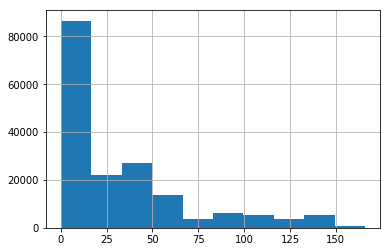

In [123]:
df.Speed.hist();


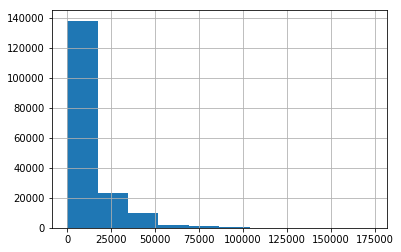

In [124]:

df.DL_bitrate.hist();


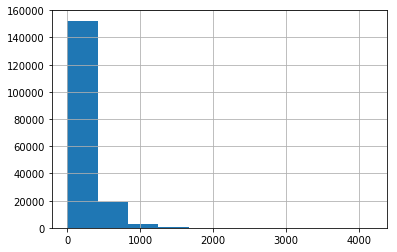

In [125]:
df.UL_bitrate.hist();

these are alll unevenly disrubtued maybe i can revist this in the furture

In [126]:
df.describe(include=[object])

,Timestamp,Operatorname,NetworkMode,RSRQ,SNR,CQI,RSSI,State,NRxRSRP,NRxRSRQ,ServingCell_Lon,ServingCell_Lat,ServingCell_Distance,path
count,174523,174523,174523,174523,174523,174523,174523,174523,174523,174523,174523,174523,174523,174523
unique,142130,7,7,51,104,15,59,2,145,53,635,623,5381,5
top,2018.02.02_10.28.45,A,LTE,-2,5.0,6,-94,D,-51,-24,-8.491719,51.893905,650.55,car
freq,6,139813,120824,51929,58118,72291,80499,160336,79859,81034,67189,67189,52737,75874


In [128]:
df =pd.get_dummies(df, columns= ['Operatorname','path','State','NetworkMode'])

In [129]:
df.head()

,Timestamp,Longitude,Latitude,Speed,CellID,RSRP,RSRQ,SNR,CQI,RSSI,...,path_train,State_D,State_I,NetworkMode_EDGE,NetworkMode_GPRS,NetworkMode_HSDPA,NetworkMode_HSPA+,NetworkMode_HSUPA,NetworkMode_LTE,NetworkMode_UMTS
0,2018.01.25_19.50.43,-8.466939,51.897914,46,2,-99,-14,-2.0,6,-82,...,0,1,0,0,0,0,0,0,1,0
1,2018.01.25_19.50.44,-8.466616,51.897283,30,2,-99,-14,-1.0,7,-78,...,0,1,0,0,0,0,0,0,1,0
2,2018.01.25_19.50.44,-8.466616,51.897283,30,2,-99,-14,-2.0,7,-78,...,0,1,0,0,0,0,0,0,1,0
3,2018.01.25_19.50.46,-8.466616,51.897283,30,2,-98,-15,-1.0,6,-81,...,0,1,0,0,0,0,0,0,1,0
4,2018.01.25_19.50.47,-8.466616,51.897283,30,2,-98,-15,-1.0,4,-91,...,0,1,0,0,0,0,0,0,1,0


# after cleaning

In [130]:
df.to_csv("cleanedLTEdate.csv")

In [5]:
import pandas as pd
df= pd.read_csv("cleanedLTEdate.csv")
df.drop(df.columns[0],axis=True,inplace=True)
df.head()

,Timestamp,Longitude,Latitude,Speed,CellID,RSRP,RSRQ,SNR,CQI,RSSI,...,path_train,State_D,State_I,NetworkMode_EDGE,NetworkMode_GPRS,NetworkMode_HSDPA,NetworkMode_HSPA+,NetworkMode_HSUPA,NetworkMode_LTE,NetworkMode_UMTS
0,2018.01.25_19.50.43,-8.466939,51.897914,46,2,-99,-14,-2.0,6,-82,...,0,1,0,0,0,0,0,0,1,0
1,2018.01.25_19.50.44,-8.466616,51.897283,30,2,-99,-14,-1.0,7,-78,...,0,1,0,0,0,0,0,0,1,0
2,2018.01.25_19.50.44,-8.466616,51.897283,30,2,-99,-14,-2.0,7,-78,...,0,1,0,0,0,0,0,0,1,0
3,2018.01.25_19.50.46,-8.466616,51.897283,30,2,-98,-15,-1.0,6,-81,...,0,1,0,0,0,0,0,0,1,0
4,2018.01.25_19.50.47,-8.466616,51.897283,30,2,-98,-15,-1.0,4,-91,...,0,1,0,0,0,0,0,0,1,0


In [6]:
from torch import tensor

t_dep =tensor(df.Speed)

In [7]:
added_cols =["Operatorname_0","Operatorname_27201","Operatorname_27202","Operatorname_27203","Operatorname_27205",
             "Operatorname_A","Operatorname_B","path_bus","path_car","path_pedestrian","path_static","path_train",
             "State_D","State_I","NetworkMode_EDGE","NetworkMode_GPRS","NetworkMode_HSDPA","NetworkMode_HSPA+",
             "NetworkMode_HSUPA","NetworkMode_LTE","NetworkMode_UMTS"]
df[added_cols].head()

,Operatorname_0,Operatorname_27201,Operatorname_27202,Operatorname_27203,Operatorname_27205,Operatorname_A,Operatorname_B,path_bus,path_car,path_pedestrian,...,path_train,State_D,State_I,NetworkMode_EDGE,NetworkMode_GPRS,NetworkMode_HSDPA,NetworkMode_HSPA+,NetworkMode_HSUPA,NetworkMode_LTE,NetworkMode_UMTS
0,0,0,0,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [9]:
indep_cols = ["RSRP","RSRQ","SNR","CQI","RSSI","DL_bitrate","UL_bitrate","NRxRSRP","NRxRSRQ","ServingCell_Lon",
              	"ServingCell_Lat","ServingCell_Distance"] +added_cols

t_indep =tensor(df[indep_cols].values,dtype=torch.float)
t_indep


tensor([[ -99.,  -14.,   -2.,  ...,    0.,    1.,    0.],
        [ -99.,  -14.,   -1.,  ...,    0.,    1.,    0.],
        [ -99.,  -14.,   -2.,  ...,    0.,    1.,    0.],
        ...,
        [-101.,   -6.,   13.,  ...,    0.,    1.,    0.],
        [-101.,   -6.,   13.,  ...,    0.,    1.,    0.],
        [-101.,   -6.,   13.,  ...,    0.,    1.,    0.]])

In [10]:
t_indep.shape

torch.Size([174523, 33])

In [11]:
torch.manual_seed(442)

n_coeff = t_indep.shape[1]
coeffs = torch.rand(n_coeff)-0.5
coeffs

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,
         0.2799, -0.4392,  0.2103,  0.3625,  0.1722,  0.2324, -0.3575, -0.0010,
        -0.1833, -0.2411,  0.0489,  0.0866, -0.0534,  0.3132, -0.1487, -0.2551,
         0.3328,  0.1292,  0.2361, -0.2622,  0.4051, -0.2674, -0.2312,  0.1147,
         0.4072])

In [12]:
def calc_preds(coeffs, indeps): return (indeps*coeffs).sum(axis=1)
def calc_loss(coeffs, indeps, deps): return torch.abs(calc_preds(coeffs, indeps)-deps).mean()

In [13]:
coeffs.requires_grad_()

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,
         0.2799, -0.4392,  0.2103,  0.3625,  0.1722,  0.2324, -0.3575, -0.0010,
        -0.1833, -0.2411,  0.0489,  0.0866, -0.0534,  0.3132, -0.1487, -0.2551,
         0.3328,  0.1292,  0.2361, -0.2622,  0.4051, -0.2674, -0.2312,  0.1147,
         0.4072], requires_grad=True)

In [14]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss

tensor(3784.2598, grad_fn=<MeanBackward0>)

In [15]:
loss.backward()

In [16]:
coeffs.grad

tensor([ 3.8865e+01,  4.6431e+00, -3.2750e+00, -3.9335e+00,  3.5832e+01,
        -9.3209e+03, -1.5654e+02,  3.2149e+01,  8.9541e+00,  3.7425e+00,
        -2.2893e+01,  2.6064e+03,  9.6835e-04,  6.3029e-05,  1.3179e-04,
         4.5839e-05,  1.7763e-04, -3.3142e-01, -1.1153e-01, -2.8483e-02,
        -2.8848e-01, -9.9397e-02, -7.2008e-02,  4.6802e-02, -5.2165e-01,
         8.0087e-02,  7.1051e-03,  1.1460e-05, -2.8650e-05, -6.2318e-02,
        -1.0961e-02, -3.7553e-01,  1.5471e-04])

In [17]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
coeffs.grad

tensor([ 7.7731e+01,  9.2862e+00, -6.5500e+00, -7.8670e+00,  7.1664e+01,
        -1.8642e+04, -3.1308e+02,  6.4298e+01,  1.7908e+01,  7.4850e+00,
        -4.5787e+01,  5.2128e+03,  1.9367e-03,  1.2606e-04,  2.6358e-04,
         9.1678e-05,  3.5525e-04, -6.6285e-01, -2.2305e-01, -5.6967e-02,
        -5.7696e-01, -1.9879e-01, -1.4402e-01,  9.3604e-02, -1.0433e+00,
         1.6017e-01,  1.4210e-02,  2.2920e-05, -5.7299e-05, -1.2464e-01,
        -2.1923e-02, -7.5105e-01,  3.0941e-04])

In [18]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
with torch.no_grad():
    coeffs.sub_(coeffs.grad * 0.1)
    coeffs.grad.zero_()
    print(calc_loss(coeffs, t_indep, t_dep))

tensor(29623548.)


In [19]:
from fastai.data.transforms import RandomSplitter
trn_split,val_split=RandomSplitter(seed=42)(df)

ModuleNotFoundError: No module named 'fastai'